In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import scanpy as sc

In [2]:
p9.options.dpi=300
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [4]:
OAK1_adata=sc.read_h5ad(data_dir+'/barnyard_OAK150kali1/adata_raw.h5ad')

In [5]:
K562_OAK1_adata=OAK1_adata[OAK1_adata.obs.call.isin(['GRCh38']),OAK1_adata.var.species.isin(['GRCh38'])]

In [6]:
sc.pp.calculate_qc_metrics(K562_OAK1_adata, percent_top=None, log1p=False, inplace=True) 

Trying to set attribute `.obs` of view, copying.


In [7]:
df_K562_OAK1=K562_OAK1_adata.obs[['cell_bc','Read_count','n_genes_by_counts','total_counts']]

In [9]:
df_K562_OAK1['sample']='OAK_K562'

/local/50469756/ipykernel_25582/1051311041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
Chromium_adata=sc.read_h5ad(data_dir+'/barnyard_10x/Downsampling/adata.h5ad')

In [11]:
df_K562_Chromium=Chromium_adata.obs[['cell_bc','Read_count','n_genes_by_counts','total_counts']]

In [12]:
df_K562_Chromium['sample']='Chromium_K562'

In [14]:
K562_scifi=pd.read_csv(data_dir+'/ScifiRNA/PD193_383k_K562.csv',header=0)

In [15]:
K562_scifi_all=K562_scifi[['cell_index','Read_count','n_genes_by_counts','UMI_count']]

In [16]:
df_K562_scifi=K562_scifi_all[ (K562_scifi_all['Read_count']>14500) & (K562_scifi_all['Read_count']<17500) ]

In [17]:
df_K562_scifi.columns=['cell_bc','Read_count','n_genes_by_counts','total_counts']

In [19]:
df_K562_scifi['sample']='scifi_K562'

/local/50469756/ipykernel_25582/1064140796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [20]:
df_K562=pd.concat([df_K562_Chromium,df_K562_scifi,df_K562_OAK1],ignore_index=True)

In [21]:
df_K562.groupby(['sample'])['Read_count'].mean()

sample
Chromium_K562    15906.646131
OAK_K562         15914.272004
scifi_K562       15917.833024
Name: Read_count, dtype: float64

In [22]:
df_K562.groupby(['sample'])['n_genes_by_counts'].mean()

sample
Chromium_K562    3905.197111
OAK_K562         3014.109953
scifi_K562        240.072975
Name: n_genes_by_counts, dtype: float64

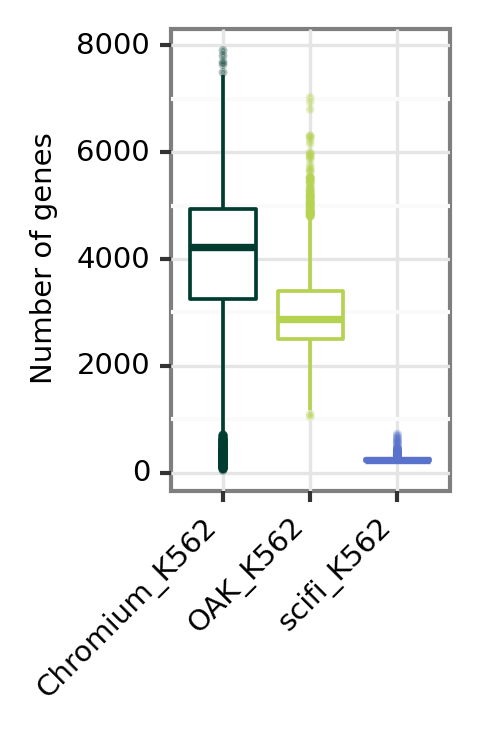

<ggplot: (2932182253300)>

In [23]:
plot=p9.ggplot(data=df_K562,
               mapping=p9.aes(x='sample',y='n_genes_by_counts',color='sample')
              )
plotsave=plot+ p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2,show_legend=False) \
+ p9.themes.theme_bw() \
+ p9.scale_x_discrete(limits=['Chromium_K562','OAK_K562','scifi_K562']) \
+ p9.scale_color_manual(values = {'Chromium_K562':'#003C30','OAK_K562':'#B5D251','scifi_K562':'#5972CB'}) \
+ p9.theme(axis_text_x=p9.element_text(size=7, colour="black")) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(size=7, colour="black")) \
+ p9.xlab('') \
+ p9.ylab('Number of genes') \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(figure_size=(1.2,2)) # inch
plotsave

In [48]:
plot=p9.ggplot(data=df_K562,
               mapping=p9.aes(x='sample',y='n_genes_by_counts',color='sample')
              )
plotsave=plot+ p9.geom_boxplot(outlier_alpha=0.3,outlier_size=0.2,show_legend=False) \
+ p9.themes.theme_bw() \
+ p9.scale_x_discrete(limits=['Chromium_K562','OAK_K562','scifi_K562']) \
+ p9.scale_color_manual(values = {'Chromium_K562':'#003C30','OAK_K562':'#B5D251','scifi_K562':'#5972CB'}) \
+ p9.theme(axis_text_x=p9.element_text(size=7, colour="black")) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.theme(axis_text_y=p9.element_text(size=7, colour="black")) \
+ p9.xlab('') \
+ p9.ylab('Number of genes') \
+ p9.theme(text=p9.element_text(size=7)) \
+ p9.theme(figure_size=(1.2,2)) # inch
fig=plotsave.draw()
fig.set_size_inches(1.2, 2)
fig.savefig('K562_nGene_comp.svg',format='svg',dpi=300,bbox_inches='tight')  